In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
path = '../../DATA/raw/Fraud Detection/Transaction.csv'
df=pd.read_csv(path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Lets get a basic understanding of the dataset 


In [ ]:
print(df.info())
print()
print(df.shape)
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

(6362620, 11)

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+

In [4]:
# Lets try to see the missing values, to ensure that there are none
print(df.isnull().sum().sort_values(ascending=False).head(10))
print()
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


###### SO NO missig values, or any inconsistencies with the data types, thus the dataset appears to be clean

#### Lets try understanding the Target column Distribution 

C:\Users\acer\AppData\Local\Temp\ipykernel_13596\1934493719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df['isFraud'], palette='viridis')


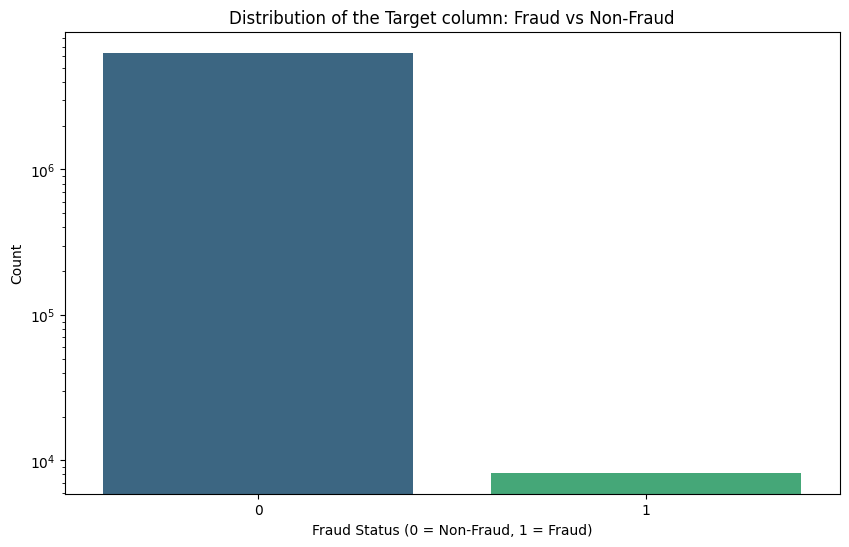


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [ ]:
# Lets try understanding the Target column Distribution 
plt.figure(figsize=(10,6))
sns.countplot(x= df['isFraud'], palette='viridis')

plt.title('Distribution of the Target column: Fraud vs Non-Fraud')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.yscale('log')
plt.show()
print()
print(df['isFraud'].value_counts(normalize=True) * 100)

type
CASH_OUT    4116
TRANSFER    4097
CASH_IN        0
DEBIT          0
PAYMENT        0
Name: isFraud, dtype: int64



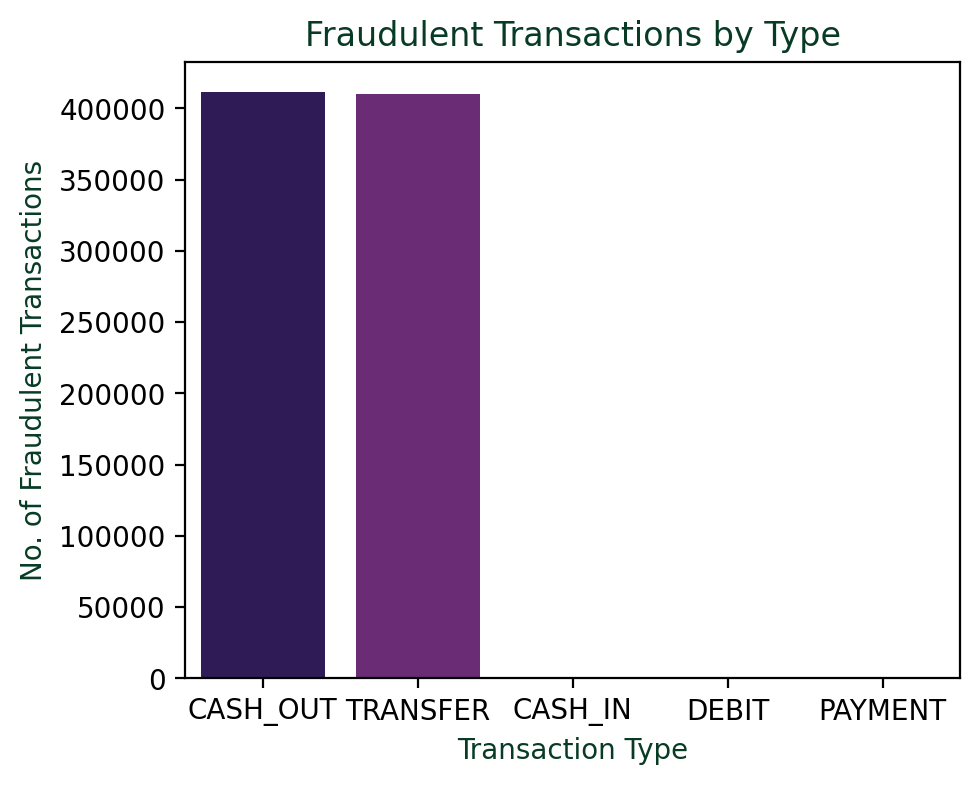


The Plot shows that 'Transfer' and 'Cash Out' transactions have similar count, which proves the notion that, a Fraud transaction cashes out the money after transferring it to another account


In [ ]:
# Lets try to understand the which type of transactions are more likely to be fraudulent
fraud_by_type = df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
print(fraud_by_type)
print()

plt.figure(figsize=(5,4), dpi = 200)
sns.barplot(x=fraud_by_type.index, y= fraud_by_type.values*100, palette='magma')
plt.xlabel('Transaction Type', color = '#083b25')
plt.ylabel('No. of Fraudulent Transactions', color = '#083b25')
plt.title('Fraudulent Transactions by Type', color = '#083b25')
plt.show()
print()
print("The Plot shows that 'Transfer' and 'Cash Out' transactions have similar count, which proves the notion that, a Fraud transaction cashes out the money after transferring it to another account")

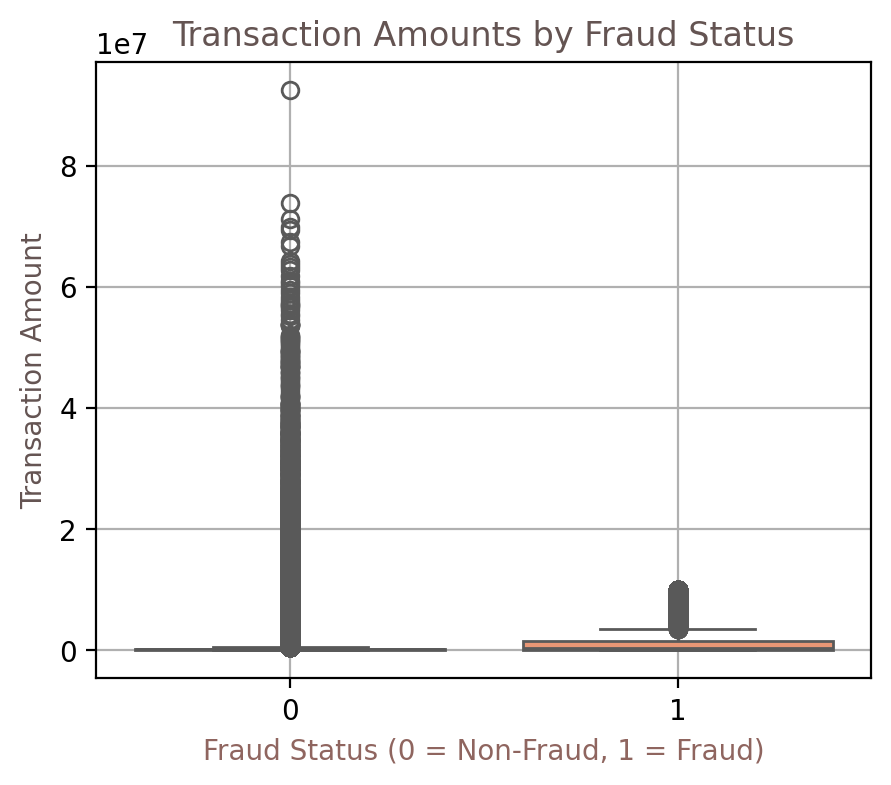


The Boxplot shows something practical, as in a real world scenario 
 A very high amount will not be transferred as the model would block based on threshold values set by the bank, thus triggering system alerts and identification.
 Hence fraud Transactions need to be in a sweet spot to fool the rue based system alerts


In [ ]:
# Lets see the variation in the amount of fraudulent transactions vs non-fraudulent transactions

df[df['isFraud']==0]['amount'].nlargest(10)
df[df['isFraud']==1]['amount'].nlargest(10)

fraud_df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
plt.figure(figsize=(5,4), dpi = 200)
sns.boxplot(data = fraud_df, x = 'isFraud', y = 'amount', palette='Set2')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)', color = "#8F655F")
plt.ylabel('Transaction Amount', color = '#645452')
plt.title('Transaction Amounts by Fraud Status', color = '#645452')
plt.grid()
plt.show()
print()
print('The Boxplot shows something practical, as in a real world scenario \n A very high amount will not be transferred as the system would block based on threshold values set by the bank, thus triggering system alerts and identification.\n Hence fraud Transactions need to be in a sweet spot to fool the rule based system alerts')

In [ ]:
# Fraud Transactions are not determined by high amounts alone, but rather the behavioral patterns of the transactions.
# Lets try understanding the behavioural pattern of these fraudelent Transactions  


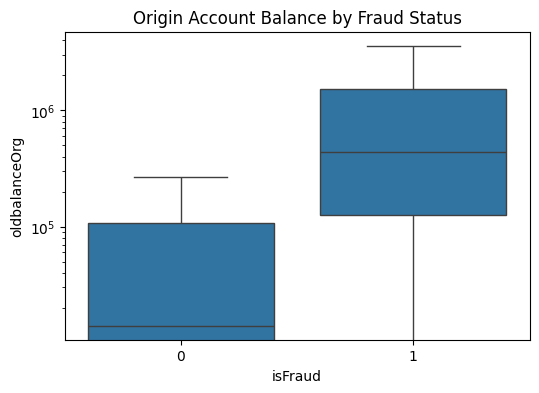

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['isFraud'], y=df['oldbalanceOrg'], showfliers=False)
plt.yscale('log')
plt.title("Origin Account Balance by Fraud Status")
plt.show()


In [54]:
fraud_df = df[df['isFraud']==1]
Non_fraud = df[df['isFraud']==0]
print(fraud_df['oldbalanceOrg'].describe())
print()
print(fraud_df['oldbalanceDest'].min())
print()
print(Non_fraud['oldbalanceOrg'].describe())


count    8.213000e+03
mean     1.649668e+06
std      3.547719e+06
min      0.000000e+00
25%      1.258224e+05
50%      4.389835e+05
75%      1.517771e+06
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

0.0

count    6.354407e+06
mean     8.328287e+05
std      2.887144e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.406900e+04
75%      1.069695e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64


In [55]:
fraud_df['newbalanceDest'].describe()

count    8.213000e+03
mean     1.279708e+06
std      3.908817e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.676420e+03
75%      1.058725e+06
max      2.367265e+08
Name: newbalanceDest, dtype: float64

In [56]:
fraud_df['oldbalanceDest'].describe()

count    8.213000e+03
mean     5.442496e+05
std      3.336421e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.478287e+05
max      2.362305e+08
Name: oldbalanceDest, dtype: float64

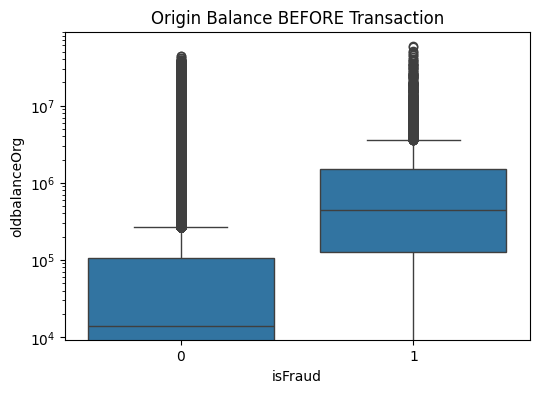

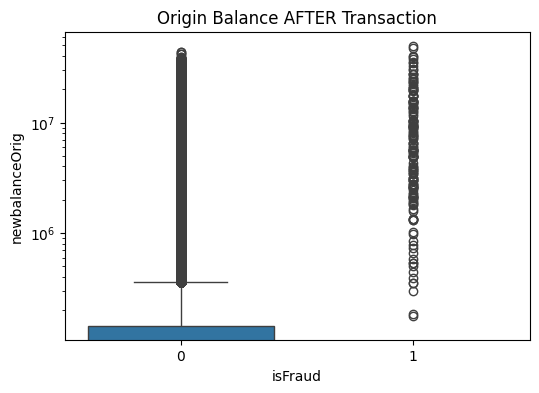

In [57]:
#origin (merchant) balances
raud = df[df['isFraud'] == 1]
legit = df[df['isFraud'] == 0]

plt.figure(figsize=(6,4))
sns.boxplot(x=df['isFraud'], y=df['oldbalanceOrg'])
plt.yscale('log')
plt.title("Origin Balance BEFORE Transaction")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['isFraud'], y=df['newbalanceOrig'])
plt.yscale('log')
plt.title("Origin Balance AFTER Transaction")
plt.show()

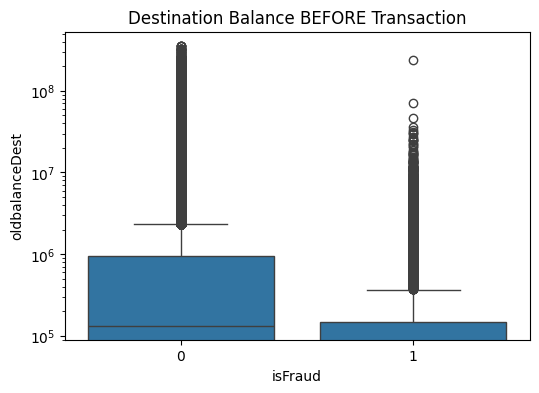

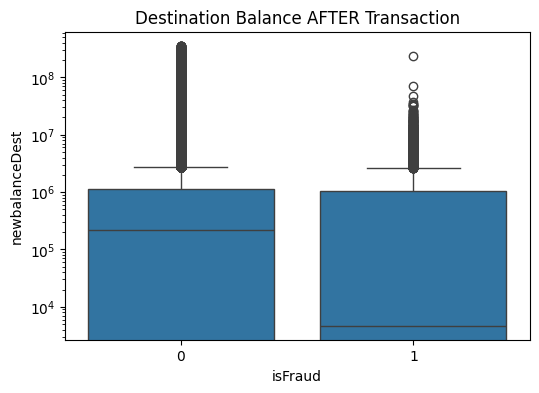

In [59]:
#destination (mule) balances
plt.figure(figsize=(6,4))
sns.boxplot(x=df['isFraud'], y=df['oldbalanceDest'])
plt.yscale('log')
plt.title("Destination Balance BEFORE Transaction")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['isFraud'], y=df['newbalanceDest'])
plt.yscale('log')
plt.title("Destination Balance AFTER Transaction")
plt.show()


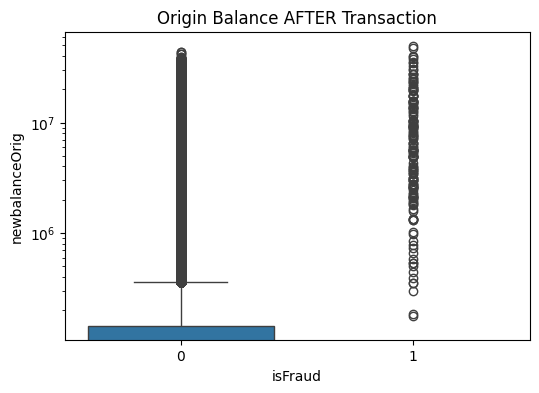

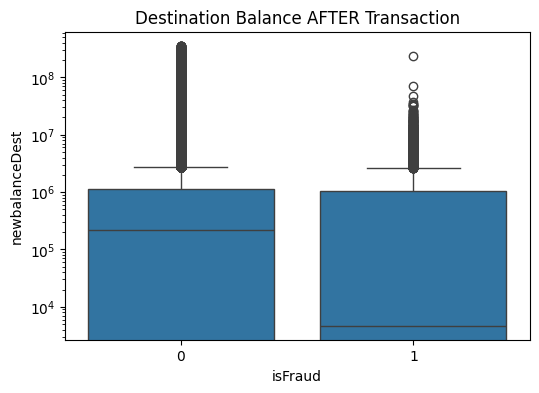

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['isFraud'], y=df['newbalanceOrig'])
plt.yscale('log')
plt.title("Origin Balance AFTER Transaction")
plt.show()

print()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['isFraud'], y=df['newbalanceDest'])
plt.yscale('log')
plt.title("Destination Balance AFTER Transaction")
plt.show()



In [47]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
